In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sentence_transformers import SentenceTransformer
import warnings
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
warnings.filterwarnings("ignore")

# from yellowbrick.classifier import ClassPredictionError
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc, f1_score, accuracy_score, confusion_matrix, recall_score, precision_score

In [3]:
model = SentenceTransformer('all-mpnet-base-v2')
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [4]:
df = pd.read_csv('p2_dataset.csv')[['text', 'label']]
print(df.shape)
df = df.drop_duplicates()
df

(2131, 2)


,text,label
0,latest headlin cnn busi great shutdown newsroo...,0
4,china want take victori lap handl coronaviru o...,0
5,coronaviru disinform creat challeng china gove...,0
6,china coronaviru eat wild anim made illeg end ...,0
7,china economi could shrink first time decad co...,0
...,...,...
2126,mani countri around world success contain coro...,1
2127,need flatten curv coronaviru pandem encourag p...,1
2128,mysteri miss bu rider began bu driver small to...,1
2129,agn desert exemplar modernist literatur novel ...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2054 non-null   object
 1   label   2054 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.1+ KB


In [6]:
sentence_embeddings = model.encode(list(df['text']))
len(sentence_embeddings)

2054

In [7]:
df_emb = pd.DataFrame(sentence_embeddings)
df_emb

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.030739,-0.005963,0.005256,-0.028514,0.031612,0.017149,0.000624,0.023911,-0.007645,-0.028644,...,0.007705,0.023906,-0.024049,-0.001850,0.006022,-0.009542,-0.031423,-0.045907,-0.039928,-0.032299
1,0.039846,0.056498,0.015682,-0.013767,0.012303,-0.010344,-0.029415,0.025003,0.072894,0.004734,...,-0.026276,-0.033880,0.008704,0.026581,-0.051280,0.038149,0.018447,-0.016690,-0.002738,-0.054579
2,0.036376,0.046948,0.018566,-0.021618,-0.009794,-0.011975,0.003473,0.018735,0.040776,0.011950,...,-0.023179,-0.042313,-0.015766,0.007598,-0.034101,0.024477,-0.007803,-0.000334,-0.016396,-0.021158
3,0.050534,0.071231,-0.002423,-0.031178,0.012590,-0.011496,0.005447,0.035895,0.086236,-0.015739,...,-0.023608,-0.032257,0.001974,0.019275,-0.022514,0.042049,0.010613,-0.028211,-0.021107,-0.038964
4,-0.008027,0.107841,-0.012996,-0.016811,0.045546,0.013282,-0.006270,0.038526,0.043874,-0.004648,...,0.001905,-0.022842,0.066217,0.049216,-0.033421,0.007502,0.017808,-0.038798,-0.046979,-0.040697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049,-0.006698,0.055046,0.000482,-0.012132,0.017136,-0.022584,0.009378,0.008063,0.070210,0.006200,...,-0.034384,-0.033290,-0.035275,0.012075,-0.038016,-0.026722,0.015595,0.013542,0.019734,-0.039055
2050,0.010500,0.063594,0.004235,-0.020878,0.011152,0.018056,-0.013491,0.039279,0.017748,-0.031934,...,-0.024656,-0.003497,-0.074891,0.031284,-0.013357,0.061840,-0.005583,-0.025410,-0.037664,-0.018840
2051,-0.000513,0.013434,-0.014682,0.042930,-0.023934,0.000554,0.019773,0.017912,0.043746,-0.005417,...,0.008396,0.003279,-0.024342,0.065267,-0.007258,0.051930,-0.026596,0.007988,0.013582,-0.026941
2052,0.015953,0.070992,0.002826,0.040651,0.008828,0.030621,-0.008976,-0.005881,-0.002713,-0.021252,...,-0.054647,0.015698,0.017181,0.011434,0.000397,0.026567,-0.030616,-0.024316,0.013971,-0.011457


### Splitting the data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_emb,
                                                    df['label'],
                                                    stratify = df['label'],
                                                    test_size = 0.2,
                                                    random_state = 1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1643, 768) (411, 768) (1643,) (411,)


In [9]:
y_train.value_counts()

1    851
0    792
Name: label, dtype: int64

In [11]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
1592,0.030144,0.053283,0.013449,-0.021773,-0.020713,-0.014518,-0.022368,0.027168,0.025421,-0.031177,...,0.027611,-0.014680,-0.016499,0.061897,-0.007090,0.037149,-0.050352,0.010810,0.000196,-0.025577
1556,0.023246,0.050884,-0.009529,-0.008163,-0.001097,0.018546,0.002531,0.032529,0.033547,-0.014612,...,0.068144,-0.028029,-0.050340,0.001454,-0.020899,-0.012194,0.024625,0.024887,0.041623,-0.043753
1411,0.061460,0.096232,0.000129,-0.001465,0.012576,0.024048,-0.022484,0.042552,0.015112,-0.000122,...,0.030475,0.023937,-0.028259,0.006543,0.020002,0.038338,0.011871,0.000708,0.022520,-0.051290
1386,0.021979,0.084136,-0.007007,-0.003649,-0.010296,-0.002700,0.076570,0.018077,0.023086,-0.055831,...,0.032792,0.004115,0.010459,0.039961,-0.009021,0.020199,0.007492,-0.017801,-0.003438,-0.027993
764,0.054380,0.104544,-0.003837,-0.004543,-0.041641,0.060837,0.031237,0.010220,0.019835,-0.055737,...,-0.005169,0.057772,-0.019356,-0.025201,0.046156,0.001377,-0.028744,-0.014951,-0.015476,-0.001487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.015330,0.057435,-0.021437,-0.041764,0.012887,-0.003789,-0.001755,0.018858,0.055216,-0.004146,...,-0.005163,-0.022516,0.021538,0.027204,-0.034651,0.003427,0.036696,-0.036143,-0.035654,-0.040324
1186,0.010618,0.022183,-0.015841,-0.011098,-0.016412,0.022289,-0.018490,0.033249,0.000329,-0.057136,...,0.044568,0.018219,-0.024013,0.039031,-0.015484,0.051285,-0.006766,0.010139,-0.008541,-0.016954
1463,0.016958,0.060461,0.003841,-0.024352,-0.016611,0.036252,0.016847,0.039062,0.006797,-0.034625,...,-0.004337,0.034564,0.033287,0.035531,0.003456,0.068513,-0.013069,-0.016002,-0.043585,-0.016029
2039,-0.023895,0.005856,-0.046871,-0.003289,0.010047,-0.008212,0.074020,0.070743,0.027366,-0.005719,...,-0.016742,0.018920,-0.020449,0.017814,-0.018565,0.046604,0.009990,-0.003852,-0.008346,-0.045005


### Model Training

In [12]:
# def visualizer(clf):
#     visualizer = ClassPredictionError(clf, classes= [0, 1])

#     # Fit the training data to the visualizer
#     visualizer.fit(X_train, y_train)

#     # Evaluate the model on the test data
#     visualizer.score(X_test, y_test)

#     # Draw visualization
#     visualizer.show()
    
def metrics(pred):
    classes = [0, 1]
    matrix = confusion_matrix(y_test, pred, labels = classes)
    mat = matrix.diagonal()/matrix.sum(axis=1)
    print(classification_report(y_test, pred, labels = classes,
                                digits=4))

    print('confusion matrix: ', mat)

    Accuracy = accuracy_score(y_test,pred)
    F1 = f1_score(y_test, pred, average='macro')
    print("Accuracy:", Accuracy)

    rec = recall_score(y_test, pred, average='macro')
    print('Recall: ', rec)
    prec = precision_score(y_test, pred, average='macro')
    print('Precision: ', prec)

    print('F1:', F1)
    
def get_predictions(tpr, fpr, threshold, ypred):
    #If tpr is hight & fpr is low : (tpr*(1-fpr)) is maximum
    actual_ypred = []

    thres = threshold[np.argmax(tpr * (1 - fpr))]
    for value in ypred:
        if value < thres:
            actual_ypred.append(0)
        else:
            actual_ypred.append(1)
    return actual_ypred
    
def get_roc_curve(model_name, classifier):
    
    Ypred_train = classifier.predict(X_train)
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, Ypred_train)
    
    Ypred_test = classifier.predict(X_test)
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, Ypred_test)

    auc_train = round(auc(fpr_train, tpr_train), 4)
    auc_test = round(auc(fpr_test, tpr_test), 4)

    plt.rcParams["figure.figsize"] = [5, 4]
    plt.plot(fpr_train, tpr_train, label = f'train AUC : {auc_train}')
    plt.plot(fpr_test, tpr_test, label = f'test AUC : {auc_test}')
    plt.legend()
    plt.grid()
    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('parameter') 
    plt.ylabel('AUC')
    plt.show()

    roc_results = {
    'ypred_train' : Ypred_train,
    'ypred_test' : Ypred_test,
    'fpr_train' : fpr_train,
    'fpr_test' : fpr_test,
    'tpr_train' : tpr_train,
    'tpr_test' : tpr_test,
    'threshold_train' : threshold_train,
    'threshold_test' : threshold_test
    }
    return roc_results

def get_confusion_matrix(model_name, roc_results):
    actual_ypred_train = get_predictions(roc_results['tpr_train'],
                                         roc_results['fpr_train'],
                                         roc_results['threshold_train'],
                                         roc_results['ypred_train'])

    matrix_train = confusion_matrix(y_train, actual_ypred_train)

    actual_ypred_test = get_predictions(roc_results['tpr_test'],
                                        roc_results['fpr_test'],
                                        roc_results['threshold_test'],
                                        roc_results['ypred_test'])

    matrix_test = confusion_matrix(y_test, actual_ypred_test)

    plt.rcParams["figure.figsize"] = [12, 5]
    plt.rcParams["figure.autolayout"] = True
    f, axes = plt.subplots(1, 2)
    
    axes[0].title.set_text(f'{model_name} Training Confusion Matrix')
    sns.heatmap(matrix_train, annot = True, ax = axes[0], fmt = "d")


    sns.heatmap(matrix_test, annot = True, ax = axes[1], fmt = "d")
    axes[1].title.set_text(f'{model_name} Testing Confusion Matrix')

    return actual_ypred_test, actual_ypred_train

### Random Forest Classifier

In [13]:
randomforest_model = RandomForestClassifier()

parameters = { 'max_depth' : [10, 20, 30],
               'n_estimators' : [90, 150, 180],
               'max_samples' : [0.6, 0.8]
 }

cross_validation = 3
scoring_metric = "f1"
randomforest_model_cv = GridSearchCV(randomforest_model, 
                                     parameters,
                                     cv = cross_validation,
                                     scoring = scoring_metric,
                                     return_train_score=True)

randomforest_model_cv.fit(X_train, y_train)
print('Best Params ', randomforest_model_cv.best_params_)

Best Params  {'max_depth': 20, 'max_samples': 0.6, 'n_estimators': 150}


In [14]:
parameters = {
     'max_depth' : 20,
     'n_estimators' : 150,
     'max_samples' : 0.6
}
randomforest_model = RandomForestClassifier(max_depth = parameters['max_depth'],
                                            max_samples = parameters['max_samples'],
                                            n_estimators = parameters['n_estimators'])

randomforest_model.fit(X_train, y_train)
Ypredtest = randomforest_model.predict_proba(X_test)[:,1]

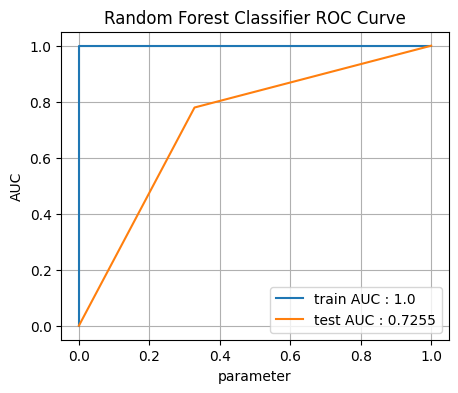

In [15]:
roc_results = get_roc_curve('Random Forest Classifier',
                             randomforest_model)

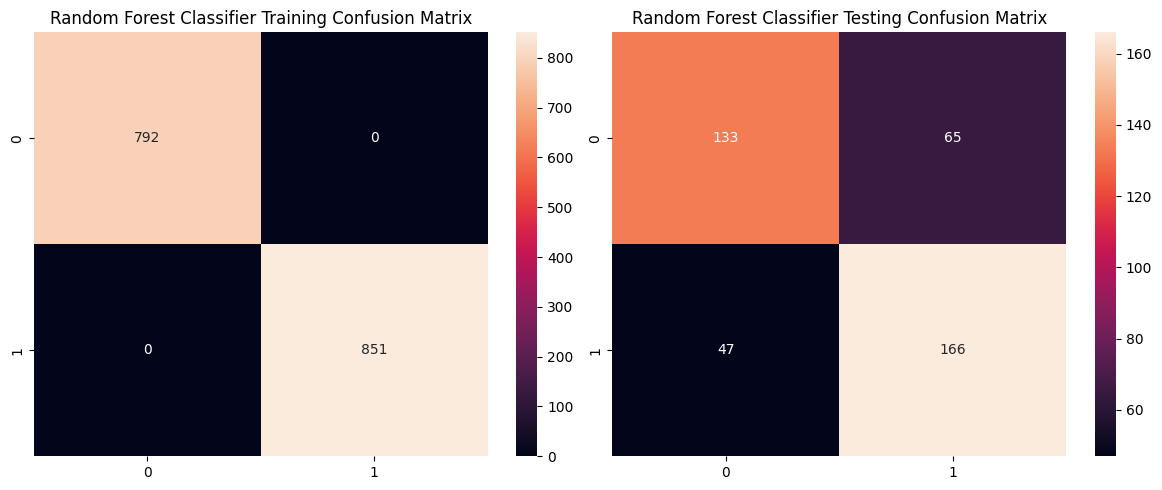

In [16]:
results = get_confusion_matrix('Random Forest Classifier',
                                roc_results)

In [17]:
metrics(results[0])

              precision    recall  f1-score   support

           0     0.7389    0.6717    0.7037       198
           1     0.7186    0.7793    0.7477       213

    accuracy                         0.7275       411
   macro avg     0.7288    0.7255    0.7257       411
weighted avg     0.7284    0.7275    0.7265       411

confusion matrix:  [0.67171717 0.77934272]
Accuracy: 0.7274939172749392
Recall:  0.7255299473609333
Precision:  0.7287518037518037
F1: 0.7257257257257257


### Logistic Regression

In [18]:
logistic_model = LogisticRegression()
parameters = { 'C' : [0.01, 0.1, 1, 3, 10],
               'penalty' : ['l2', 'elasticnet']
             }

cross_validation = 3
scoring_metric = "f1"

logistic_model_cv = GridSearchCV(logistic_model,
                                 parameters,
                                 cv = cross_validation,
                                 scoring = scoring_metric,
                                 return_train_score=True)

logistic_model_cv.fit(X_train, y_train)
print('Best Params ', logistic_model_cv.best_params_)

Best Params  {'C': 10, 'penalty': 'l2'}


In [19]:
parameters = { 'C' : 10,
               'penalty' : 'l2'
 }

logistic_model = LogisticRegression(C = parameters['C'], penalty = parameters['penalty'])
logistic_model.fit(X_train, y_train)
Ypredtest = logistic_model.predict_proba(X_test)[:,1]

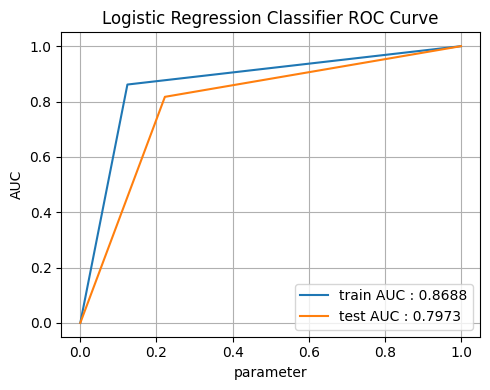

In [20]:
roc_results = get_roc_curve('Logistic Regression Classifier',
                             logistic_model)

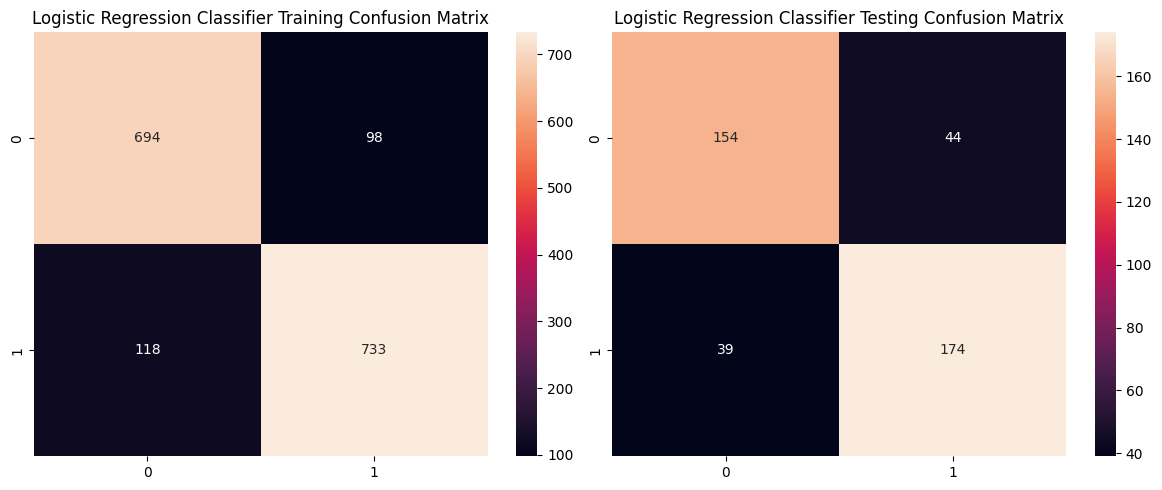

In [21]:
results = get_confusion_matrix('Logistic Regression Classifier',
                                roc_results)

In [22]:
metrics(results[0])

              precision    recall  f1-score   support

           0     0.7979    0.7778    0.7877       198
           1     0.7982    0.8169    0.8074       213

    accuracy                         0.7981       411
   macro avg     0.7980    0.7973    0.7976       411
weighted avg     0.7981    0.7981    0.7979       411

confusion matrix:  [0.77777778 0.81690141]
Accuracy: 0.7980535279805353
Recall:  0.7973395931142411
Precision:  0.7980462993772877
F1: 0.7975741895668789


### XG Boost

In [23]:
import xgboost

xgboost_model = xgboost.XGBClassifier()

parameters = { 'max_depth' : [10, 20, 30],
               'n_estimators' : [90, 150, 180],
               'min_child_weight' : [1, 5, 10 ]
 }

cross_validation = 3
scoring_metric = "f1"
xgboost_model_cv = GridSearchCV(xgboost_model, 
                                parameters,
                                cv = cross_validation,
                                scoring = scoring_metric,
                                return_train_score=True)

xgboost_model_cv.fit(X_train, y_train)
print('Best Params ', xgboost_model_cv.best_params_)

Best Params  {'max_depth': 10, 'min_child_weight': 10, 'n_estimators': 180}


In [24]:
parameters = { 'max_depth' : 10,
               'min_child_weight' : 10,
               'n_estimators' : 180
 }

xgboost_model = xgboost.XGBClassifier(max_depth = parameters['max_depth'],
                                      min_child_weight = parameters['min_child_weight'],
                                      n_estimators = parameters['n_estimators'])
xgboost_model.fit(X_train, y_train)
Ypredtest = xgboost_model.predict(X_test)

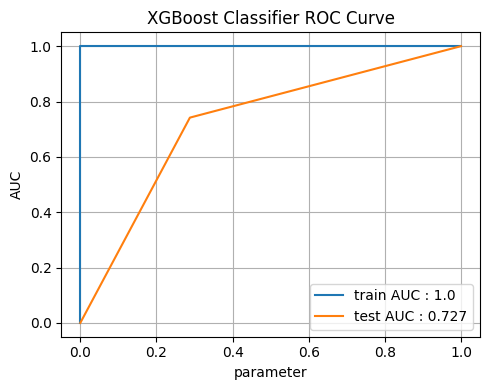

In [25]:
roc_results = get_roc_curve('XGBoost Classifier',
                             xgboost_model)

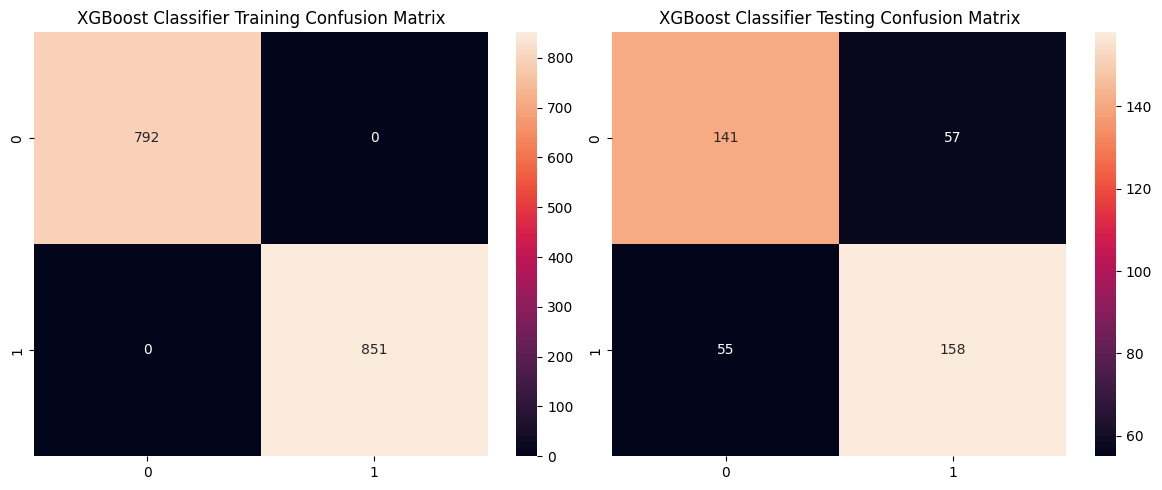

In [26]:
results = get_confusion_matrix('XGBoost Classifier',
                                roc_results)

In [27]:
metrics(results[0])

              precision    recall  f1-score   support

           0     0.7194    0.7121    0.7157       198
           1     0.7349    0.7418    0.7383       213

    accuracy                         0.7275       411
   macro avg     0.7271    0.7270    0.7270       411
weighted avg     0.7274    0.7275    0.7274       411

confusion matrix:  [0.71212121 0.74178404]
Accuracy: 0.7274939172749392
Recall:  0.7269526248399488
Precision:  0.7271357380161367
F1: 0.7270268988092414


### SVM

In [30]:
svm_model = SVC()

parameters = { 'kernel' : ['poly', 'rbf', 'sigmoid'],
               'max_iter' : [20, 50, 100]
 }

cross_validation = 3
scoring_metric = "f1"
svm_model_cv = GridSearchCV(svm_model, 
                            parameters,
                            cv = cross_validation,
                            scoring = scoring_metric,
                            return_train_score=True)

svm_model_cv.fit(X_train, y_train)
print('Best Params ', svm_model_cv.best_params_)

Best Params  {'kernel': 'rbf', 'max_iter': 100}


In [31]:
parameters = {
         'kernel' : 'rbf',
         'max_iter' : 100,
        }

svm_model = SVC(kernel = parameters['kernel'],
max_iter = parameters['max_iter'], probability = True)

svm_model.fit(X_train, y_train)
Ypredtest = svm_model.predict_proba(X_test)[:,1]

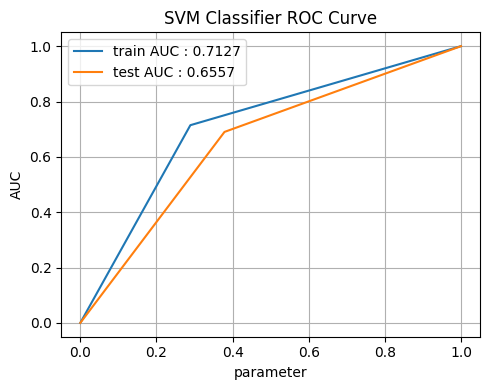

In [32]:
roc_results = get_roc_curve('SVM Classifier',
                             svm_model)

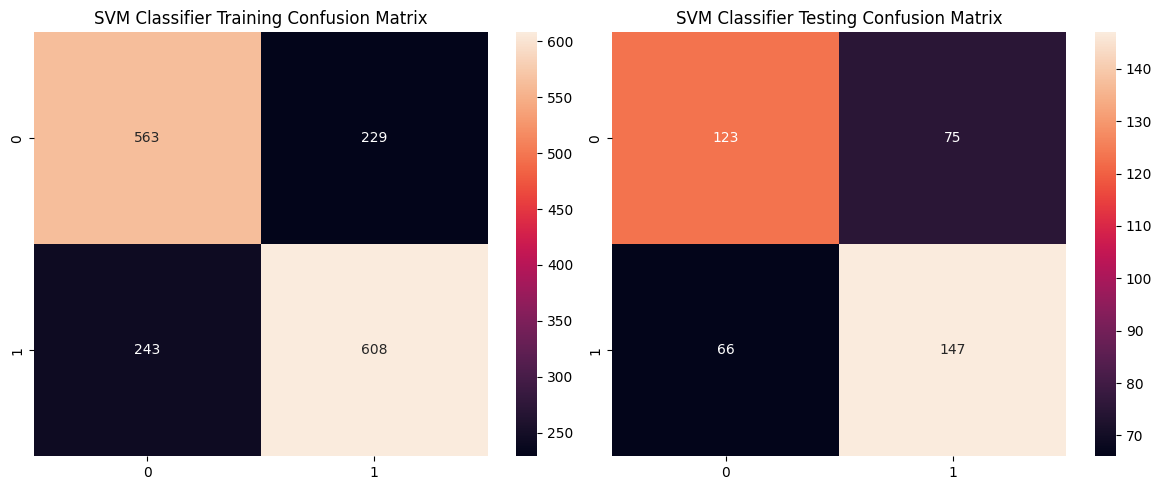

In [33]:
results = get_confusion_matrix('SVM Classifier',
                                roc_results)

In [34]:
metrics(results[0])

              precision    recall  f1-score   support

           0     0.6508    0.6212    0.6357       198
           1     0.6622    0.6901    0.6759       213

    accuracy                         0.6569       411
   macro avg     0.6565    0.6557    0.6558       411
weighted avg     0.6567    0.6569    0.6565       411

confusion matrix:  [0.62121212 0.69014085]
Accuracy: 0.656934306569343
Recall:  0.6556764831412718
Precision:  0.6564779064779065
F1: 0.6557604918470996


### Multinomial Naive Bayes

In [36]:
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)
Ypredtest = bnb_model.predict_proba(X_test)[:,1]

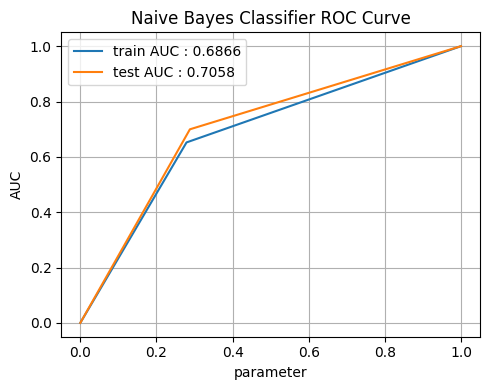

In [37]:
roc_results = get_roc_curve('Naive Bayes Classifier',
                             bnb_model)

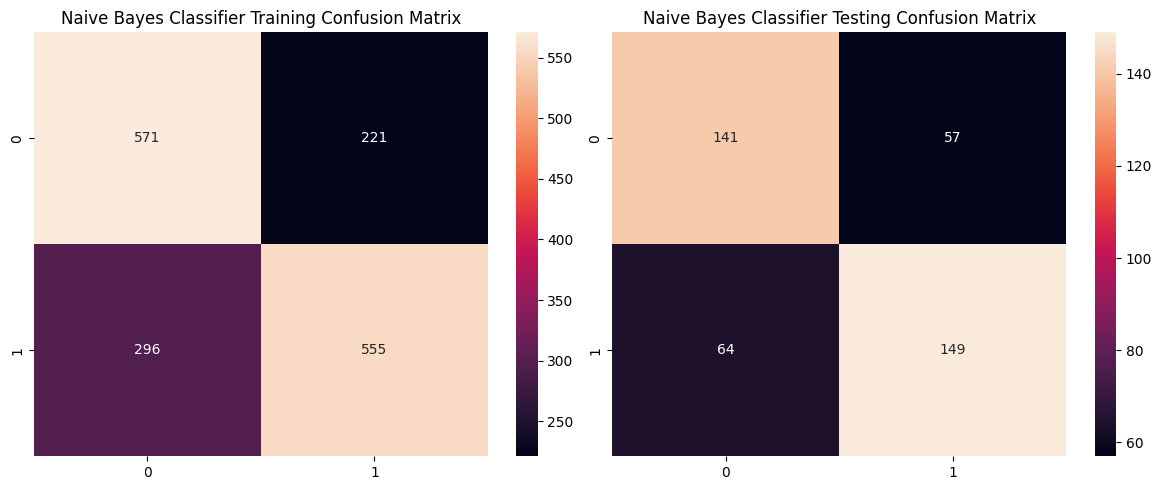

In [38]:
results = get_confusion_matrix('Naive Bayes Classifier',
                                roc_results)

In [39]:
metrics(results[0])

              precision    recall  f1-score   support

           0     0.6878    0.7121    0.6998       198
           1     0.7233    0.6995    0.7112       213

    accuracy                         0.7056       411
   macro avg     0.7056    0.7058    0.7055       411
weighted avg     0.7062    0.7056    0.7057       411

confusion matrix:  [0.71212121 0.69953052]
Accuracy: 0.7055961070559611
Recall:  0.7058258642765685
Precision:  0.7055529244612835
F1: 0.7054845224065334


In [45]:
import tabulate
print('Task P2 : Sentence Transformers - Model all-mpnet-base-v2')
conclusion = [['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Train AUC', 'Test AUC'],
              ['Logistic Regression', 79.8, 79.8, 79.7, 79.7, 0.86, 0.79],
              ['XGBoost Classifier', 72.7, 72.7, 72.6, 72.7, 1, 0.72],
              ['Random Forest Classifier', 72.7, 72.8, 72.5, 72.5, 1, 0.72],
              ['SVM Classifier', 65.6, 65.6, 65.5, 65.5, 0.71, 0.65],
              ['Naive Bayes Classifier',  70.5, 70.5, 70.5, 70.5, 0.68, 0.70],   
             ]
print(tabulate.tabulate(conclusion, tablefmt='fancy_grid'))

Task P2 : Sentence Transformers - Model all-mpnet-base-v2
╒══════════════════════════╤══════════╤═══════════╤════════╤══════════╤═══════════╤══════════╕
│ Model                    │ Accuracy │ Precision │ Recall │ F1 Score │ Train AUC │ Test AUC │
├──────────────────────────┼──────────┼───────────┼────────┼──────────┼───────────┼──────────┤
│ Logistic Regression      │ 79.8     │ 79.8      │ 79.7   │ 79.7     │ 0.86      │ 0.79     │
├──────────────────────────┼──────────┼───────────┼────────┼──────────┼───────────┼──────────┤
│ XGBoost Classifier       │ 72.7     │ 72.7      │ 72.6   │ 72.7     │ 1         │ 0.72     │
├──────────────────────────┼──────────┼───────────┼────────┼──────────┼───────────┼──────────┤
│ Random Forest Classifier │ 72.7     │ 72.8      │ 72.5   │ 72.5     │ 1         │ 0.72     │
├──────────────────────────┼──────────┼───────────┼────────┼──────────┼───────────┼──────────┤
│ SVM Classifier           │ 65.6     │ 65.6      │ 65.5   │ 65.5     │ 0.71      │ 0.6